In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [93]:
#Reading and transforming file
df = pd.read_csv("C:\\Users\\bisen\\OneDrive\\Desktop\\DailyDelhiClimateTrain.csv")

In [94]:
df.dtypes

date             object
meantemp        float64
humidity        float64
wind_speed      float64
meanpressure    float64
dtype: object

In [95]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [96]:
df.shape

(1462, 5)

In [97]:
df.isnull().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [99]:
df['date']=pd.to_datetime(df['date'])
df.set_index('date', inplace = True)
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
               '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30',
               '2016-12-31', '2017-01-01'],
              dtype='datetime64[ns]', name='date', length=1462, freq=None)

In [100]:
df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [101]:
df['Year'] = df.index.year
df.head()

,meantemp,humidity,wind_speed,meanpressure,Year
date,,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013
2013-01-02,7.400000,92.000000,2.980000,1017.800000,2013
2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013
2013-01-04,8.666667,71.333333,1.233333,1017.166667,2013
2013-01-05,6.000000,86.833333,3.700000,1016.500000,2013


In [102]:
df.describe()

,meantemp,humidity,wind_speed,meanpressure,Year
count,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548,2014.502736
std,7.348103,16.769652,4.561602,180.231668,1.120248
min,6.000000,13.428571,0.000000,-3.041667,2013.000000
25%,18.857143,50.375000,3.475000,1001.580357,2014.000000
50%,27.714286,62.625000,6.221667,1008.563492,2015.000000
75%,31.305804,72.218750,9.238235,1014.944901,2016.000000
max,38.714286,100.000000,42.220000,7679.333333,2017.000000


In [103]:
df.columns.is_unique

True

In [105]:
df= df.loc[~df.index.duplicated(), :]

In [106]:
df.describe()

,meantemp,humidity,wind_speed,meanpressure,Year
count,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548,2014.502736
std,7.348103,16.769652,4.561602,180.231668,1.120248
min,6.000000,13.428571,0.000000,-3.041667,2013.000000
25%,18.857143,50.375000,3.475000,1001.580357,2014.000000
50%,27.714286,62.625000,6.221667,1008.563492,2015.000000
75%,31.305804,72.218750,9.238235,1014.944901,2016.000000
max,38.714286,100.000000,42.220000,7679.333333,2017.000000


In [107]:
latest_df = df.loc['2013' : '2017']
latest_df.head()

,meantemp,humidity,wind_speed,meanpressure,Year
date,,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013
2013-01-02,7.400000,92.000000,2.980000,1017.800000,2013
2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013
2013-01-04,8.666667,71.333333,1.233333,1017.166667,2013
2013-01-05,6.000000,86.833333,3.700000,1016.500000,2013


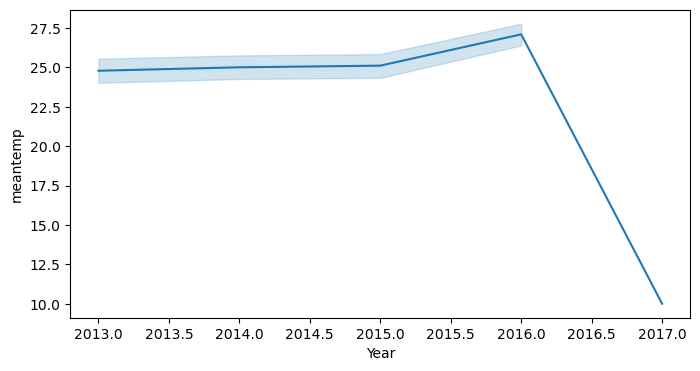

In [109]:
plt.figure(figsize = (8,4))
sns.lineplot(x = 'Year', y = 'meantemp', data = latest_df)
plt.show()

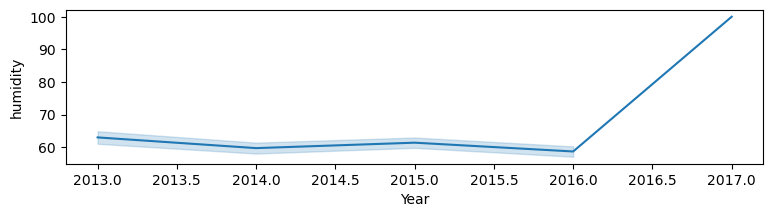

In [110]:
plt.figure(figsize = (9,2))
sns.lineplot(x = 'Year', y = 'humidity', data = latest_df)
plt.show()

In [111]:
df.columns

Index(['meantemp', 'humidity', 'wind_speed', 'meanpressure', 'Year'], dtype='object')

In [113]:
resample_df = latest_df[['meantemp']].resample('A').mean()

In [114]:
resample_df.head()

,meantemp
date,
2013-12-31,24.791494
2014-12-31,25.010673
2015-12-31,25.114591
2016-12-31,27.103373
2017-12-31,10.000000


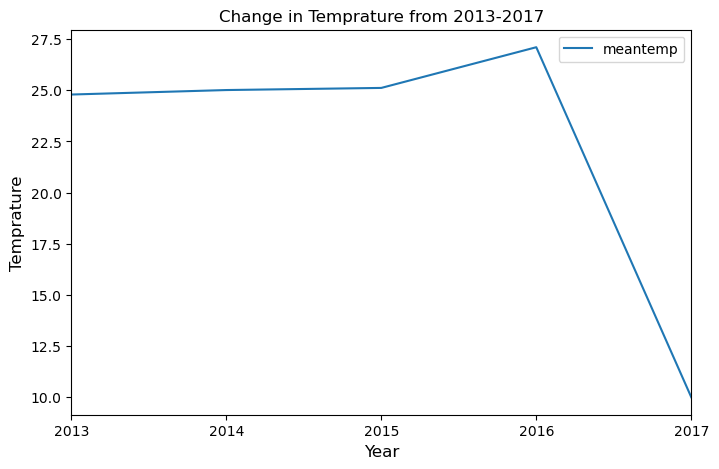

In [115]:
resample_df.plot(title='Change in Temprature from 2013-2017', figsize=(8,5))
plt.ylabel('Temprature',fontsize=12)
plt.xlabel('Year',fontsize=12)
plt.legend()

In [120]:
print('Dickey Fuller Test results:')
test_df=adfuller(resample_df.iloc[:,0].values, autolag='AIC')
df_output= pd.Series(test_df[0:4], index = ['Test Statistics','p-value','Lags Used','No.of Observation Used'])
for key, value in test_df[4].items():
    df_output['Critical Value (%s)'%key]=value
print(df_output)

Dickey Fuller Test results:
Test Statistics          -6.785525e+00
p-value                   2.437764e-09
Lags Used                 0.000000e+00
No.of Observation Used    4.000000e+00
Critical Value (1%)      -7.355441e+00
Critical Value (5%)      -4.474365e+00
Critical Value (10%)     -3.126933e+00
dtype: float64


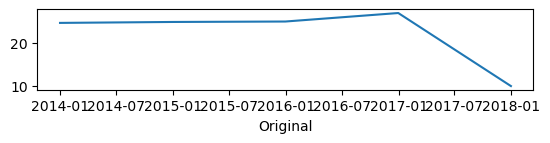

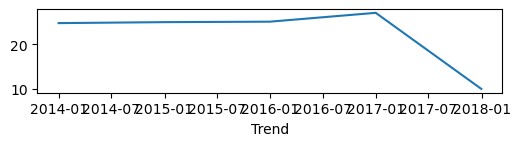

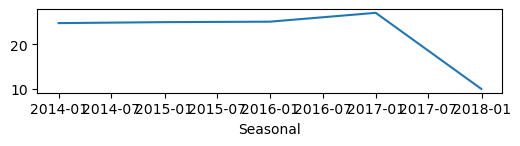

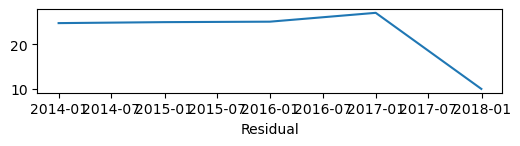

<Figure size 600x500 with 0 Axes>

In [121]:
plt.subplot(411)
plt.plot(resample_df)
plt.xlabel('Original')
plt.figure(figsize=(6,5))

plt.subplot(412)
plt.plot(resample_df)
plt.xlabel('Trend')
plt.figure(figsize=(6,5))

plt.subplot(413)
plt.plot(resample_df)
plt.xlabel('Seasonal')
plt.figure(figsize=(6,5))

plt.subplot(414)
plt.plot(resample_df)
plt.xlabel('Residual')
plt.figure(figsize=(6,5))

plt.tight_layout()

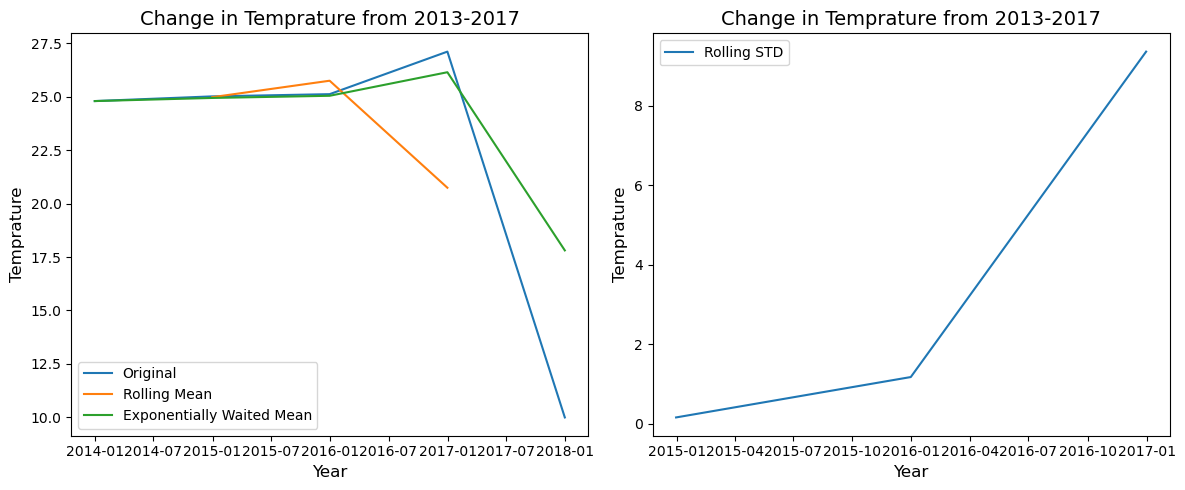

In [123]:
rol_mean=resample_df.rolling(window =3, center = True).mean()
ewm= resample_df.ewm(span=3).mean()
rol_std= resample_df.rolling(window=3, center =True).std()
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,5))

ax1.plot(resample_df, label='Original')
ax1.plot(rol_mean, label='Rolling Mean')
ax1.plot(ewm, label='Exponentially Waited Mean')
ax1.set_title('Change in Temprature from 2013-2017', fontsize=14)
ax1.set_ylabel('Temprature',fontsize=12)
ax1.set_xlabel('Year',fontsize=12)
ax1.legend()

ax2.plot(rol_std, label='Rolling STD')
ax2.set_title('Change in Temprature from 2013-2017', fontsize=14)
ax2.set_ylabel('Temprature',fontsize=12)
ax2.set_xlabel('Year',fontsize=12)
ax2.legend()

plt.tight_layout()
plt.show()

In [124]:
diff_rol_mean = resample_df - rol_mean
diff_rol_mean.dropna(inplace = True)
diff_rol_mean.head()

,meantemp
date,
2014-12-31,0.038420
2015-12-31,-0.628288
2016-12-31,6.364052


In [126]:
diff_ewm = resample_df - ewm
diff_ewm.dropna(inplace = True)
diff_ewm.head()

,meantemp
date,
2013-12-31,0.000000
2014-12-31,0.073060
2015-12-31,0.075848
2016-12-31,0.963494
2017-12-31,-7.809619


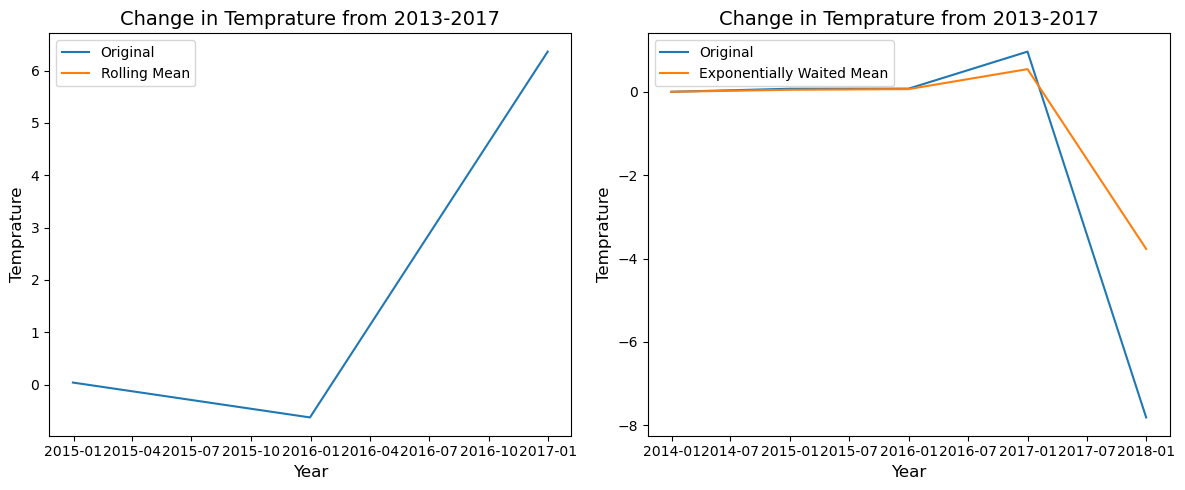

In [128]:
df_rol_mean_diff = diff_rol_mean.rolling(window =3, center = True).std()
df_ewm_diff = diff_ewm.ewm(span=3).mean()
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,5))

ax1.plot(diff_rol_mean, label='Original')
ax1.plot(df_rol_mean_diff, label='Rolling Mean')

ax1.set_title('Change in Temprature from 2013-2017', fontsize=14)
ax1.set_ylabel('Temprature',fontsize=12)
ax1.set_xlabel('Year',fontsize=12)
ax1.legend()

ax2.plot(diff_ewm, label='Original')
ax2.plot(df_ewm_diff, label='Exponentially Waited Mean')
ax2.set_title('Change in Temprature from 2013-2017', fontsize=14)
ax2.set_ylabel('Temprature',fontsize=12)
ax2.set_xlabel('Year',fontsize=12)
ax2.legend()

plt.tight_layout()
plt.show()

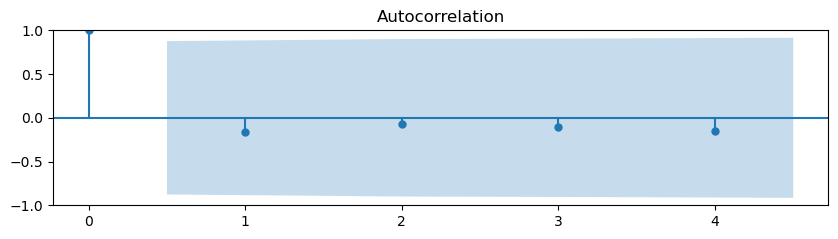

In [131]:
from matplotlib import pyplot
pyplot.figure(figsize=(10,5))
pyplot.subplot(211)
plot_acf(resample_df, ax=pyplot.gca())
plt.show()